Este es el archivo para entregar. Falta borrar lo que está indicado, descomentar lo que está indicado, y hacerlo correr con el modelo que finalmnete elijamos con el dataset completo para que queden las salidas.

In [1]:
# import of external modules;
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.under_sampling import RandomUnderSampler
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Import own modules;
from modules import CrearSentiment 
from modules import DropDuplicated
from modules import FillNa
from modules import UnirColumnas
from modules import FeatureSelection
from modules import stemfrases
from modules import Stemmer_English

In [3]:
data=pd.read_csv("Reviews.csv")
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
data.shape

(568454, 10)

In [5]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [6]:
data.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [7]:
data.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

Consideramos negativos los que tienen score 1 ó 2. Sentiment=1 es negativo, Sentiment=0 es positivo.

In [8]:
#La columna target no se puede trabajar dentro del pipeline.
crearSentiment=CrearSentiment("Score",2)
crearSentiment.transform(data)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,1
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0
...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,0
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,1
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",0
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,0


In [9]:
data.Sentiment.value_counts()

0    486417
1     82037
Name: Sentiment, dtype: int64

In [10]:
data.Sentiment.value_counts(normalize=True)

0    0.855684
1    0.144316
Name: Sentiment, dtype: float64

Ho: 85,6%

In [11]:
dropDuplicated=DropDuplicated(["UserId","Text","ProductId"])
dropDuplicated.transform(data)
#Esto tb tiene que hacerse fuera del pipeline en train. Si esto lo hiciéramos dentro del pipeline pueden quedar de diferente tamaño X e y. Cuando ya está en producción, se puede agregar como paso del pipeline.

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,1
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0
...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,0
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,1
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",0
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,0


In [12]:
englishStemmer=SnowballStemmer("english")
stopwords_en = stopwords.words('english');
stopwords_en_stem = [englishStemmer.stem(x) for x in stopwords_en]

Esto que sigue es para probar el código completo en una pequeña muestra. Si le ponemos tamaño de muestra igual a la cantidad de datos, corre sobre el dataset completo. Antes de entregar borrar estas líneas y dejar las que están comentadas luego.

In [13]:
tamano_muestra=100

In [14]:
y=data.Sentiment
train,test=train_test_split(data,stratify=y,test_size=0.3,random_state=42)

In [15]:
tamano_negativo=int(tamano_muestra*0.15)
tamano_positivo=tamano_muestra-tamano_negativo
#Toma 15% negativos y 85% positivos, que es la proporción del dataset completo.

In [16]:
train_1=train[train.Sentiment==1].sample(tamano_negativo)

In [17]:
train_1.shape

(15, 11)

In [18]:
train_0=train[train.Sentiment==0]

In [19]:
train_0=train_0.sample(tamano_positivo)

In [20]:
train_0.shape

(85, 11)

In [21]:
train_10k=pd.concat([train_1,train_0])

In [22]:
train_10k.shape

(100, 11)

In [23]:
train_10k.Sentiment.value_counts()

0    85
1    15
Name: Sentiment, dtype: int64

In [24]:
X=train_10k.drop("Sentiment",axis=1)
y=train_10k.Sentiment
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)

In [25]:
y_train.value_counts(),y_test.value_counts()

(0    64
 1    11
 Name: Sentiment, dtype: int64,
 0    21
 1     4
 Name: Sentiment, dtype: int64)

In [26]:
X_train.shape,X_test.shape


((75, 10), (25, 10))

Borrar celdas anteriores y dejar la de abajo (descomentarla).

In [27]:
# X=data.drop("Sentiment",axis=1)
# y=data.Sentiment
# X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)

Pipeline!

In [28]:
pasos = [("llenar_nulos", FillNa(" ","Summary")),
        ('unir_columnas', UnirColumnas("Text","Summary")),
        ("seleccionar_features", FeatureSelection("Text Summary")),
        ('stemmer',Stemmer_English()),
        ('vectorizer', TfidfVectorizer(stop_words=stopwords_en_stem,strip_accents='unicode')), 
        ('svd', TruncatedSVD()),
        ('clasificador', MultinomialNB())]

pipe=Pipeline(pasos)
folds=StratifiedKFold(n_splits=3,shuffle=True, random_state=42)
#Se puede cambiar la cantidad de folds tb.

In [29]:
param_grid =[
                {"stemmer":[Stemmer_English(),None],
                "vectorizer": [TfidfVectorizer(stop_words=stopwords_en_stem,strip_accents='unicode',ngram_range=(1,1)),TfidfVectorizer(stop_words=stopwords_en_stem,strip_accents='unicode',ngram_range=(2,2)),TfidfVectorizer(stop_words=stopwords_en_stem,strip_accents='unicode',ngram_range=(1,2))],
                "svd":[None,TruncatedSVD(n_components=100),TruncatedSVD(n_components=150)],
                'clasificador': [RandomForestClassifier(n_estimators=100, random_state=42)],
                },

                {"stemmer":[Stemmer_English(),None],
                "vectorizer": [TfidfVectorizer(stop_words=stopwords_en_stem,strip_accents='unicode',ngram_range=(1,1)),TfidfVectorizer(stop_words=stopwords_en_stem,strip_accents='unicode',ngram_range=(2,2)),TfidfVectorizer(stop_words=stopwords_en_stem,strip_accents='unicode',ngram_range=(1,2))],
                "svd":[None,TruncatedSVD(n_components=100),TruncatedSVD(n_components=150)],
                'clasificador': [AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),algorithm='SAMME', n_estimators=500),AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),algorithm='SAMME', n_estimators=500)],
                },

                {"stemmer":[Stemmer_English(),None],
                "vectorizer": [TfidfVectorizer(stop_words=stopwords_en_stem,strip_accents='unicode',ngram_range=(1,1)),TfidfVectorizer(stop_words=stopwords_en_stem,strip_accents='unicode',ngram_range=(2,2)),TfidfVectorizer(stop_words=stopwords_en_stem,strip_accents='unicode',ngram_range=(1,2))],
                "svd":[None],
                'clasificador': [MultinomialNB()],
                'clasificador__alpha':np.arange(0.01,1.01,0.1),
                },

               {"stemmer":[Stemmer_English(),None],
                "vectorizer": [TfidfVectorizer(stop_words=stopwords_en_stem,strip_accents='unicode',ngram_range=(1,1)),TfidfVectorizer(stop_words=stopwords_en_stem,strip_accents='unicode',ngram_range=(2,2)),TfidfVectorizer(stop_words=stopwords_en_stem,strip_accents='unicode',ngram_range=(1,2))],
                "svd":[TruncatedSVD(n_components=100),TruncatedSVD(n_components=150)],
                'clasificador': [GaussianNB()],
                },

                {"stemmer":[Stemmer_English(),None],
                "vectorizer": [TfidfVectorizer(stop_words=stopwords_en_stem,strip_accents='unicode',ngram_range=(1,1)),TfidfVectorizer(stop_words=stopwords_en_stem,strip_accents='unicode',ngram_range=(2,2)),TfidfVectorizer(stop_words=stopwords_en_stem,strip_accents='unicode',ngram_range=(1,2))],
                "svd":[None,TruncatedSVD(n_components=100),TruncatedSVD(n_components=150)],
                'clasificador': [LogisticRegression(max_iter=10000)],
                'clasificador__C':[10,100,1000],
                'clasificador__penalty': ['l2','l1'],                
                'clasificador__solver': ["saga"],
                },

                {"stemmer":[Stemmer_English(),None],
                "vectorizer": [TfidfVectorizer(stop_words=stopwords_en_stem,strip_accents='unicode',ngram_range=(1,1)),TfidfVectorizer(stop_words=stopwords_en_stem,strip_accents='unicode',ngram_range=(2,2)),TfidfVectorizer(stop_words=stopwords_en_stem,strip_accents='unicode',ngram_range=(1,2))],
                 "svd":[None,TruncatedSVD(n_components=100),TruncatedSVD(n_components=150)],
                'clasificador': [LogisticRegression(max_iter=10000)],
                'clasificador__C':[10,100,1000],
                'clasificador__penalty': ['l2'],
                'clasificador__solver': ['newton-cg','lbfgs'],               
                },

                {"stemmer":[Stemmer_English(),None],
                "vectorizer": [TfidfVectorizer(stop_words=stopwords_en_stem,strip_accents='unicode',ngram_range=(1,1)),TfidfVectorizer(stop_words=stopwords_en_stem,strip_accents='unicode',ngram_range=(2,2)),TfidfVectorizer(stop_words=stopwords_en_stem,strip_accents='unicode',ngram_range=(1,2))],
                 "svd":[None,TruncatedSVD(n_components=100),TruncatedSVD(n_components=150)],
                 'clasificador': [LogisticRegression(max_iter=10000)],
                'clasificador__penalty': ["none"],
                'clasificador__solver': ["saga"],
                },
                
               ]



In [30]:
X_train.shape

(75, 10)

In [31]:
grids=[]
grid=GridSearchCV(pipe, param_grid, cv=folds)
fit=grid.fit(X_train,y_train)
grids.append(fit)

In [32]:
pd.DataFrame(grids[0].cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clasificador,param_stemmer,param_svd,param_vectorizer,param_clasificador__alpha,param_clasificador__C,param_clasificador__penalty,param_clasificador__solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.319067,0.061408,0.084894,0.019879,RandomForestClassifier(random_state=42),Stemmer_English(),None,"TfidfVectorizer(stop_words=['i', 'me', 'my', '...",NaN,NaN,NaN,NaN,{'clasificador': RandomForestClassifier(random...,0.84,0.84,0.88,0.853333,0.018856,4
1,0.368574,0.075724,0.090655,0.030559,RandomForestClassifier(random_state=42),Stemmer_English(),None,"TfidfVectorizer(ngram_range=(2, 2),\n ...",NaN,NaN,NaN,NaN,{'clasificador': RandomForestClassifier(random...,0.84,0.84,0.88,0.853333,0.018856,4
2,0.300335,0.036720,0.073331,0.011146,RandomForestClassifier(random_state=42),Stemmer_English(),None,"TfidfVectorizer(ngram_range=(1, 2),\n ...",NaN,NaN,NaN,NaN,{'clasificador': RandomForestClassifier(random...,0.84,0.84,0.88,0.853333,0.018856,4
3,0.366463,0.038040,0.121697,0.051906,RandomForestClassifier(random_state=42),Stemmer_English(),TruncatedSVD(n_components=100),"TfidfVectorizer(stop_words=['i', 'me', 'my', '...",NaN,NaN,NaN,NaN,{'clasificador': RandomForestClassifier(random...,0.84,0.84,0.88,0.853333,0.018856,4
4,0.336001,0.007116,0.078000,0.009199,RandomForestClassifier(random_state=42),Stemmer_English(),TruncatedSVD(n_components=100),"TfidfVectorizer(ngram_range=(2, 2),\n ...",NaN,NaN,NaN,NaN,{'clasificador': RandomForestClassifier(random...,0.84,0.84,0.88,0.853333,0.018856,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0.097284,0.005384,0.010001,0.001632,LogisticRegression(max_iter=10000),None,TruncatedSVD(n_components=100),"TfidfVectorizer(ngram_range=(2, 2),\n ...",NaN,NaN,none,saga,{'clasificador': LogisticRegression(max_iter=1...,0.84,0.84,0.88,0.853333,0.018856,4
356,0.105687,0.003432,0.011997,0.001737,LogisticRegression(max_iter=10000),None,TruncatedSVD(n_components=100),"TfidfVectorizer(ngram_range=(1, 2),\n ...",NaN,NaN,none,saga,{'clasificador': LogisticRegression(max_iter=1...,0.84,0.84,0.88,0.853333,0.018856,4
357,0.083785,0.004638,0.012670,0.003858,LogisticRegression(max_iter=10000),None,TruncatedSVD(n_components=150),"TfidfVectorizer(stop_words=['i', 'me', 'my', '...",NaN,NaN,none,saga,{'clasificador': LogisticRegression(max_iter=1...,0.84,0.84,0.88,0.853333,0.018856,4
358,0.086359,0.010451,0.009668,0.000943,LogisticRegression(max_iter=10000),None,TruncatedSVD(n_components=150),"TfidfVectorizer(ngram_range=(2, 2),\n ...",NaN,NaN,none,saga,{'clasificador': LogisticRegression(max_iter=1...,0.84,0.84,0.88,0.853333,0.018856,4


In [33]:
print(grid.best_score_)
print(grid.best_params_)

0.8666666666666667
{'clasificador': AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=500), 'stemmer': None, 'svd': TruncatedSVD(n_components=100), 'vectorizer': TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'our',
                            'ourselv', 'you', "you'r", "you'v", "you'll",
                            "you'd", 'your', 'your', 'yourself', 'yourselv',
                            'he', 'him', 'his', 'himself', 'she', 'she', 'her',
                            'her', 'herself', 'it', 'it', 'it', 'itself', ...],
                strip_accents='unicode')}


In [34]:
grid.best_estimator_
#No me lo muestra como esquema.

Pipeline(steps=[('llenar_nulos',
                 FillNa(columna_a_rellenar='Summary', relleno=' ')),
                ('unir_columnas',
                 UnirColumnas(columna1='Text', columna2='Summary')),
                ('seleccionar_features',
                 FeatureSelection(selected_features='Text Summary')),
                ('stemmer', None),
                ('vectorizer',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'our', 'ourselv', 'you',
                                             "you'r", "you'v", "you'll",
                                             "you'd", 'your', 'your',
                                             'yourself', 'yourselv', 'he',
                                             'him', 'his', 'himself', 'she',
                                             'she', 'her', 'her', 'herself',
                                             'it', 'it', 'it', 'itself', ...],
            

In [35]:
y_pred = grid.predict(X_test)

In [36]:
import pickle

In [37]:
# with open('model_prueba.pkl', 'wb') as model_1:
#     pickle.dump(grid, model_1)

In [38]:
datos = {'Summary': ["Great product!"], 'Text': ['Best purchase ever made!']}
datos=pd.DataFrame.from_dict(datos)

In [39]:
grid.predict(datos)

array([0], dtype=int64)

In [40]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('llenar_nulos',
                                        FillNa(columna_a_rellenar='Summary',
                                               relleno=' ')),
                                       ('unir_columnas',
                                        UnirColumnas(columna1='Text',
                                                     columna2='Summary')),
                                       ('seleccionar_features',
                                        FeatureSelection(selected_features='Text '
                                                                           'Summary')),
                                       ('stemmer', Stemmer_English()),
                                       ('vectorizer...
                                                                     'herself',
                                                                     'it', 'it',
     

In [41]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        21
           1       0.00      0.00      0.00         4

    accuracy                           0.84        25
   macro avg       0.42      0.50      0.46        25
weighted avg       0.71      0.84      0.77        25



c:\Users\Usuario\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
print(accuracy_score(y_test, y_pred))

0.84


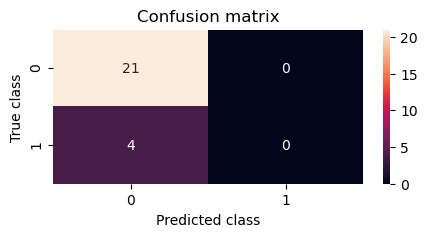

In [44]:
conf_matrix = confusion_matrix(y_test, y_pred); 
plt.figure(figsize=(5, 2)); sns.heatmap(conf_matrix,  annot=True, fmt="d");
plt.title("Confusion matrix"); plt.ylabel('True class'); plt.xlabel('Predicted class');plt.show()

Ver recall? Para eso, abrir otra vez el archivo (con otro nombre), agregar scoring="recall" en el Grid y correr otra vez.

<hr>